## Imports

In [24]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

### Load the interaction results

In [25]:
# For SATORI based interactions
df_A = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt', sep='\t')
#df_A = pd.read_csv('../../Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results_v9_run2_5000/interactions_summary_attnLimit-0.12.txt', sep='\t')

# For FIS based interactions
df_B = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt', sep='\t')
#df_B = pd.read_csv('../../DFIM_Arabidopsis_experiment_v10/Interactions/interactions_summary_attnLimit-0.txt', sep='\t')

### Pre-process the interactions

In [26]:
ATTN = preprocess_for_comparison(df_A, for_arabidopsis=True)
DFIM = preprocess_for_comparison(df_B, for_arabidopsis=True)

### Individual interactions analysis

#### Get unique interactions per method and their intersection

In [27]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='TF_Interaction')

In [28]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 306, SATORI: 529, Common: 284


#### Comparison plot: individual interactions

In [29]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

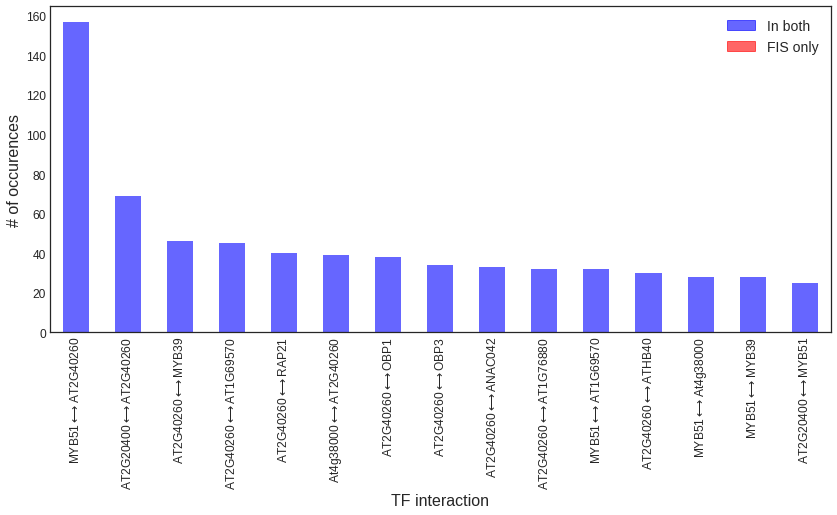

In [30]:
plot_interaction_comparison(df_res, first_n=15, xlabel='TF interaction', store_pdf_path=None, fig_size=(14,6))

### Family interactions analysis

#### Get unique family interactions per method and their intersection

In [8]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='Family_Interaction')

In [9]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 86, SATORI: 110, Common: 75


#### Comparison plot: family interactions

In [10]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

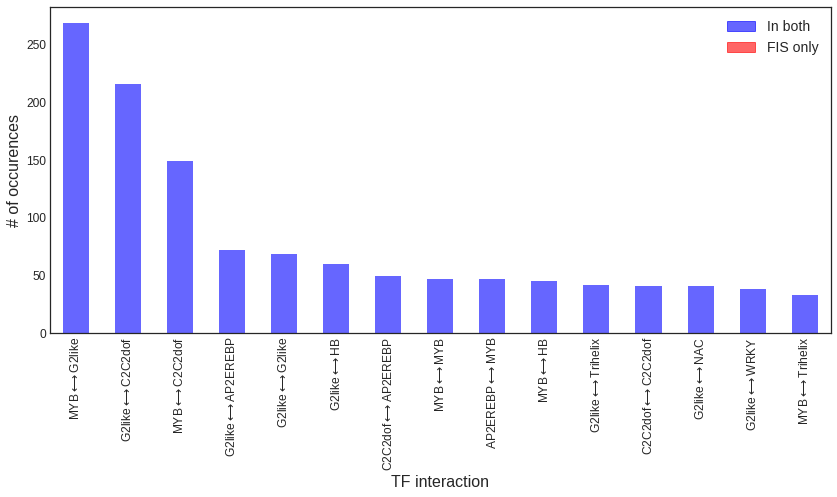

In [11]:
plot_interaction_comparison(df_res, first_n=15, xlabel='Family interaction', store_pdf_path=None, fig_size=(14,6))